# Regularizadores

### 📌 Quando usar cada modelo?

Ridge: Quando todos os coeficientes são importantes, mas devem ser reduzidos.

Lasso: Quando você quer seleção de variáveis (zera coeficientes irrelevantes).

Elastic Net: Quando há muitos atributos correlacionados e você quer um equilíbrio entre Ridge e Lasso.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(42)

m = 100
X = 2 * np.random.rand(m, 1)  
y = 4 + 3 * X + np.random.randn(m, 1)  

In [5]:
X[:10], y[:10]

(array([[0.74908024],
        [1.90142861],
        [1.46398788],
        [1.19731697],
        [0.31203728],
        [0.31198904],
        [0.11616722],
        [1.73235229],
        [1.20223002],
        [1.41614516]]),
 array([[6.33428778],
        [9.40527849],
        [8.48372443],
        [5.60438199],
        [4.71643995],
        [5.29307969],
        [5.82639572],
        [8.67878666],
        [6.79819647],
        [7.74667842]]))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Padronizando Dados 

Etapa importante para a regualrização

In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
X_train_scaled[:10], X_test_scaled[:10]

(array([[ 1.55811593],
        [ 1.43909981],
        [-0.92168212],
        [-1.48921717],
        [ 1.7813481 ],
        [-0.97754544],
        [-1.18825698],
        [ 0.18759605],
        [ 0.82399159],
        [-1.58833488]]),
 array([[-1.3890576 ],
        [ 1.46524586],
        [ 1.04433772],
        [ 0.66758691],
        [-0.71873094],
        [-0.09595758],
        [-0.60416768],
        [ 1.35631637],
        [-1.53661565],
        [-0.32124882]]))

## Ridge Regression

In [8]:
ridge_reg = Ridge(alpha=1)  # alpha é o parâmetro de regularização

ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

## Lasso Regression

In [9]:
lasso_reg = Lasso(alpha=0.1)  # alpha maior = mais coeficientes zerados

lasso_reg.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_reg.predict(X_test_scaled)

## Elastic Net

In [10]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # L1_ratio = 0.5 mistura Ridge e Lasso

elastic_net.fit(X_train_scaled, y_train)
y_pred_elastic = elastic_net.predict(X_test_scaled)

## Avaliação Modelos

In [11]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)

print(f"Ridge Regression MSE: {mse_ridge:.4f}")
print(f"Lasso Regression MSE: {mse_lasso:.4f}")
print(f"Elastic Net MSE: {mse_elastic:.4f}")

Ridge Regression MSE: 0.6507
Lasso Regression MSE: 0.6481
Elastic Net MSE: 0.6504


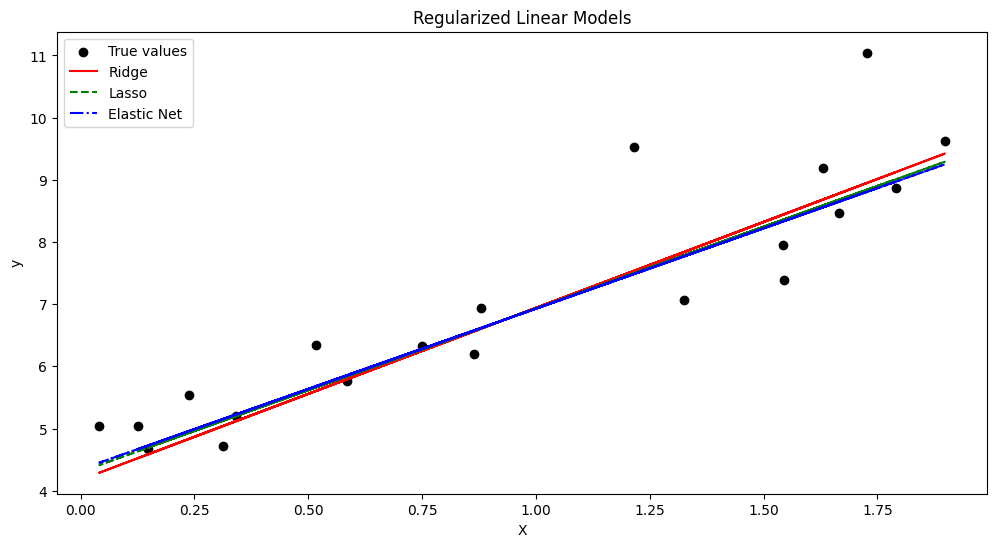

In [12]:
plt.figure(figsize=(12, 6))

plt.scatter(X_test, y_test, color="black", label="True values")
plt.plot(X_test, y_pred_ridge, "r-", label="Ridge")
plt.plot(X_test, y_pred_lasso, "g--", label="Lasso")
plt.plot(X_test, y_pred_elastic, "b-.", label="Elastic Net")

plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regularized Linear Models")
plt.show()